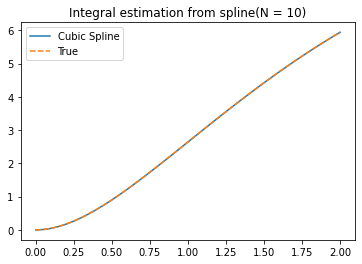

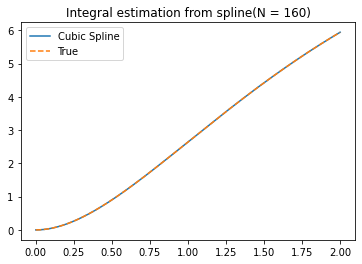

In [1]:
from __future__ import print_function
import numpy as np
from sympy import *
from pyimsl.math.cubSplineInterpECnd import cubSplineInterpECnd
from pyimsl.math.cubSplineValue import cubSplineValue
from pyimsl.math.cubSplineIntegral import cubSplineIntegral
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline


headers = ['#', 'x', 'Interpolant', 'F(x)', 'Error', '1st deriv. error', '2nd deriv. error', '3rd deriv. error', 'Integral error']
error_headers =  ['N', 'Function Error', '1st deriv. error', '2nd deriv. error', '3rd deriv. error', 'Integral error'] 


def F(x):
    return 10 * x * pow(np.e, -x)

x = symbols('x')

f = open('output.dat', "w", encoding="utf-8")
print('L8', file=f)
print('Danishevskii Danila, 3430302/90003', file=f)
print('Function: 10*x*e^(-x)', file=f)


a, b = 0, 2
N = 10

max_errors = np.empty((5, 6))
xdata_graph = np.empty((N+1))
fdata_graph =  np.empty((N+1))


firstDerivExpr = diff(10 * x * pow(np.e, -x), x)
secondDerivExpr = diff(10 * x * pow(np.e, -x), x, x)
thirdDerivExpr = diff(10 * x * pow(np.e, -x), x, x, x)

integralExpr = integrate(10 * x * pow(np.e, -x), x)
integralVal = integrate(10 * x * pow(np.e, -x), (x, a, b))

def integ(y, constant=10):
    return integralExpr.subs(x, y) + constant

print('Interval: ['+ str(a) +', '+ str(b) +']', file=f)


j = 0
while(N <= 160): # 10, 20, 40, 80, 160 numbers of partitions
    print("\n\n\nNumber of Interpolation partitions: " + str(N), file=f)

    xdata = np.empty((N + 1))
    fdata = np.empty((N + 1))
    xdata_s = np.empty((N*4 + 1))

    h = (b - a)/N
    h_x = (b - a)/(4 * N)

    for i in range(N+1):
        xdata[i] = a + i*h
        fdata[i] = F(xdata[i])
    
    #Spline
    for i in range(4*N + 1):
        xdata_s[i] = a + i*h_x

    pp = cubSplineInterpECnd(xdata, fdata)
    spline_integral_values = np.zeros((N*4+1))
    #Spline value and derivatives
    outputData = np.empty((N*4 + 1, 9))
    true_integral_values = np.zeros((N*4 + 1))
    for k in range(N*4 + 1):
        ppVal = cubSplineValue(xdata_s[k], pp)

        firstDerivVal = firstDerivExpr.subs(x, xdata_s[k])
        splineValueFirstDeriv = cubSplineValue(xdata_s[k], pp, deriv=1)
        
        secondDerivVal = secondDerivExpr.subs(x, xdata_s[k])
        splineValueSecondDeriv = cubSplineValue(xdata_s[k], pp, deriv=2)

        thirdDerivVal = thirdDerivExpr.subs(x, xdata_s[k])
        splineValueThirdDeriv = cubSplineValue(xdata_s[k], pp, deriv=3)

        firstDerivError = abs(firstDerivVal - splineValueFirstDeriv)
        secondDerivError = abs(secondDerivVal - splineValueSecondDeriv)
        thirdDerivError = abs(thirdDerivVal - splineValueThirdDeriv)

        splineIntegralVal2 = cubSplineIntegral(0, xdata_s[k], pp)
        true_integral_values[k] = integ(xdata_s[k])
        spline_integral_values[k] = splineIntegralVal2
        int_error = abs(true_integral_values[k] - spline_integral_values[k])
        outputData[k] = np.array([k + 1, xdata_s[k], ppVal, F(xdata_s[k]), abs(F(xdata_s[k]) - ppVal), firstDerivError, secondDerivError, thirdDerivError, int_error])


    # Integral
    #splineIntegralVal = cubSplineIntegral(a, b, pp)
    #integral_error = abs(integralVal - splineIntegralVal)
    #print(integral_error)
    
    if N == 160 or N == 10:
        plt.figure()
        plt.plot(xdata_s, spline_integral_values, xdata_s, true_integral_values, '--')
    
        plt.legend(['Cubic Spline', 'True'])
        plt.title('Integral estimation from spline(N = ' + str(N) +')')
        plt.show()
        

    #Max errors
    max_error = np.amax(outputData, axis=0)[4]
    max_error_deriv1 = np.amax(outputData, axis=0)[5]
    max_error_deriv2 = np.amax(outputData, axis=0)[6]
    max_error_deriv3 = np.amax(outputData, axis=0)[7]
    max_error_int = np.amax(outputData, axis=0)[8]
    max_errors[j] = np.array([N, max_error, max_error_deriv1, max_error_deriv2, max_error_deriv3, max_error_int])


    table = tabulate(outputData, headers, tablefmt="fancy_grid", floatfmt=('.0f', '.2f', '.7f', '.7f', '.7e', '.7e', '.7e', '.7e', '.7e'))
    print(table, file=f)

    N = N*2
    j += 1


print("\n\n\t\t\t\t\t\t\t\t\t\tMax Errors", file=f)
errorOutput = tabulate(max_errors, error_headers, tablefmt="fancy_grid", floatfmt=('.0f', '.7e', '.7e', '.7e', '.7e', '.7e'))
print(errorOutput, file=f)


N = 10
j = 0

print("\n\n\t\t\t\t\t\t\tErrors' Relations", file=f)
while(N <= 160):
    if j < 4:
        error_ratio = max_errors[j][1]/max_errors[j + 1][1]
        print('     [Function] Error(' + str(N) +')/Error(' + str(N*2) + ') = ' + str(error_ratio), file=f)
        error_ratio = max_errors[j][2]/max_errors[j + 1][2]
        print('     [1st Deriv] Error(' + str(N) +')/Error(' + str(N*2) + ') = ' + str(error_ratio), file=f)
        error_ratio = max_errors[j][3]/max_errors[j + 1][3]
        print('     [2nd Deriv] Error(' + str(N) +')/Error(' + str(N*2) + ') = ' + str(error_ratio), file=f)
        error_ratio = max_errors[j][4]/max_errors[j + 1][4]
        print('     [3rd Deriv] Error(' + str(N) +')/Error(' + str(N*2) + ') = ' + str(error_ratio), file=f) 
        error_ratio = max_errors[j][5]/max_errors[j + 1][5]
        print('     [Integral] Error(' + str(N) +')/Error(' + str(N*2) + ') = ' + str(error_ratio), file=f)
        
    j += 1
    N = N*2
    print('\n', file=f)

f.close()